# Домашнее задание №2 (10 баллов).

### Дедлайн: 27 апреля 23:59

#### Требования к практическому домашнему заданию.



1.   Задание выполняется в этом Jupyter Notebook'е.
2.   Код должен быть читаемым, сопровождаться комментариями, а имена переменных должны быть понятными.
3. При построении графиков обязательно должны быть подписаны координатные оси. Если на графике изображено несколько кривых, не забудьте вывести легенду. Легенда не должна закрывать графики.
4. Обязательно напишите свое ФИО в поле ниже.




ФИО: Бабинский Георгий Олегович

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from scipy.stats import beta

## ***Задача 1: распределение порядковых статистик (3 балла)***




### **1.** Зафиксируйте натуральное $n \in \mathbb{N}$ (объем выборки) и натуральное $r\in \mathbb{N}$ от $1$ до $n$ ($r$-ый элемент выборки).

In [39]:
n =  100
r = 10

### **2.** Сгенерируйте $K = n^2$ выборок $\left( X_1^k, ... , X_n^k \right)$, $1 \le k \le K$, объёма $n$ из равномерного распределения на отрезке $\left[ 0, 1 \right]$. В каждой из $K$ выборок определить $r$-ую порядковую статистику $X_{(r)}^k$. Как распределены порядковые статистики?

Порядковые статистики имеют распределение $\operatorname{Beta}(r, n + 1 - r)$ (разбиралось на семинаре)

In [40]:
K = n**2
X = np.random.rand(K, n)
X.sort(axis=1)
X_r = X[:, r-1]

### **3.**  По набору наблюдений $X_{(r)}^1, ... , X_{(r)}^K$ постройте гистограмму. На тот же рисунок добавьте график плотности распределения $\operatorname{Beta}(r, n + 1 - r)$. Убедиться, что бета-распределение хорошо аппроксимирует гистограмму.

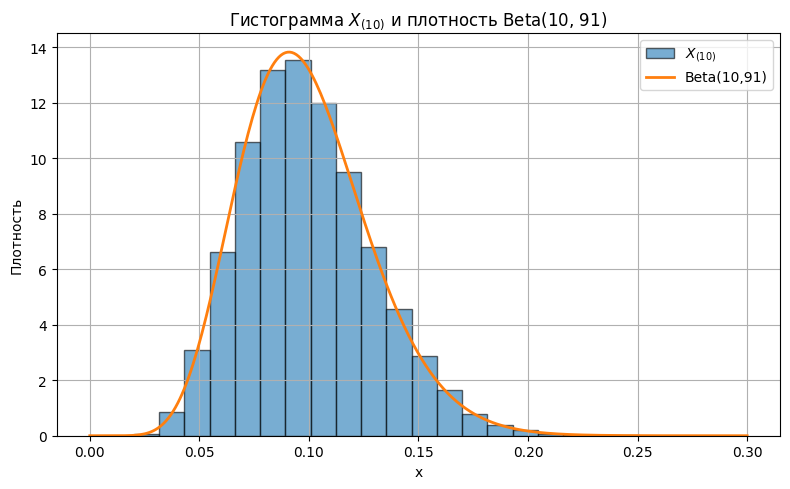

In [41]:
plt.figure(figsize=(8,5))
plt.hist(X_r, bins=20, density=True, alpha=0.6, edgecolor='black', label=f'$X_{{({r})}}$')

x = np.linspace(0, 0.3, 300)
B = math.gamma(r) * math.gamma(n+1-r) / math.gamma(n+1)
pdf = x**(r-1) * (1 - x)**(n-r) / B
plt.plot(x, pdf, linewidth=2, label=f'Beta({r},{n + 1 - r})')

plt.xlabel('x')
plt.ylabel('Плотность')
plt.title(f'Гистограмма $X_{{({r})}}$ и плотность Beta({r}, {n+1-r})')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### **4.** Убедитесь, что эмпирическая функция распределения \begin{equation} \hat F_K(t) = \cfrac{1}{K} \sum\limits_{k = 1}^{K}\mathbb{1}\left( X_{(r)}^k \le t \right), \;\;\; t \in [0, 1] \end{equation} близка к функции распределения $\operatorname{Beta}(r, n + 1 − r)$. Как это согласуется с теорией?
### Пусть  $G_{r, n + 1 - r}$  - функция распределения $\operatorname{Beta}(r, n + 1 - r)$ (доступна в библиотеке scipy). Постройте графики зависимостей $\hat F_K(t)$ и $G_{r, n+1-r}(t)$ от $t$.  
### Вычислите \begin{equation} T_K = \operatorname{sup}_{t \ge 0} \left| \hat F_K(t) - G_{r, n+1-r}(t) \right|. \end{equation}  Обратите внимание, что $\hat F_K$ - кусочно постоянная функция, а $G_{r, n+1-r}$ - монотонная. Поэтому значение статистики $T_K$ можно найти точно. Как это согласуется с теорией?

In [42]:
def F_emp(t):
    return np.searchsorted(X_r_sorted, t, side='right') / K
def G(t):
    return beta.cdf(t, r, n+1-r)

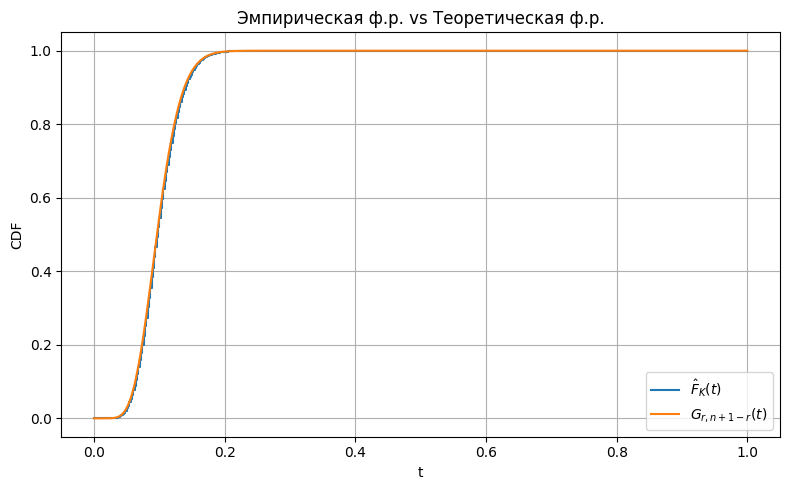

In [43]:
X_r_sorted = np.sort(X_r)

t_grid = np.linspace(0, 1, 500)
plt.figure(figsize=(8, 5))
plt.step(t_grid, F_emp(t_grid), where='post', label=r'$\hat F_K(t)$')
plt.plot(t_grid, G(t_grid), label=fr'$G_{{r,n+1-r}}(t)$')
plt.xlabel('t')
plt.ylabel('CDF')
plt.title(fr'Эмпирическая ф.р. vs Теоретическая ф.р.')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
T_K = np.max(np.abs(F_emp(t_grid)- G(t_grid)))
print(f"T_K = {T_K:.6f}")

T_K = 0.009006


Из теории мы знаем, что при $K$ $\rightarrow$ $\infty$ разность между эмпирической функцией распределения и истинной сходится к нулю по теореме Гливенко–Кантелли, а это означает, что малое значение $T_k$ подтверждает хорошее приближение к бета-распределению.

Плюс еще мы знаем, что так как у нас конечный набор точек, то наш супремум - это максимум разности истинной функции и эмпирической в точках-"скачках" (см. график), поэтому мы можем его найти точно.

### **5.** Повторите задания пп. 1, 2, 4 при различных значениях $r$ и $n$. При каждом $r$ постройте график зависимости $T_K$ от $n$. Убедитесь, что значение $T_K$ стремится к нулю с ростом $n$. Необходимо выбрать не менее трех различных значений $r$ и не менее $10$ различных значений $n$.

In [45]:
def compute_T(n, r):
    K = n ** 2
    X = np.random.rand(K, n)
    X_r = np.sort(X, axis=1)[:, r - 1]
    X_r_sorted = np.sort(X_r)

    t = np.linspace(0, 1, n)
    F_hat = np.searchsorted(X_r_sorted, t, side='right') / K
    G = beta.cdf(t, r, n + 1 - r)
    return np.max(np.abs(F_hat - G))

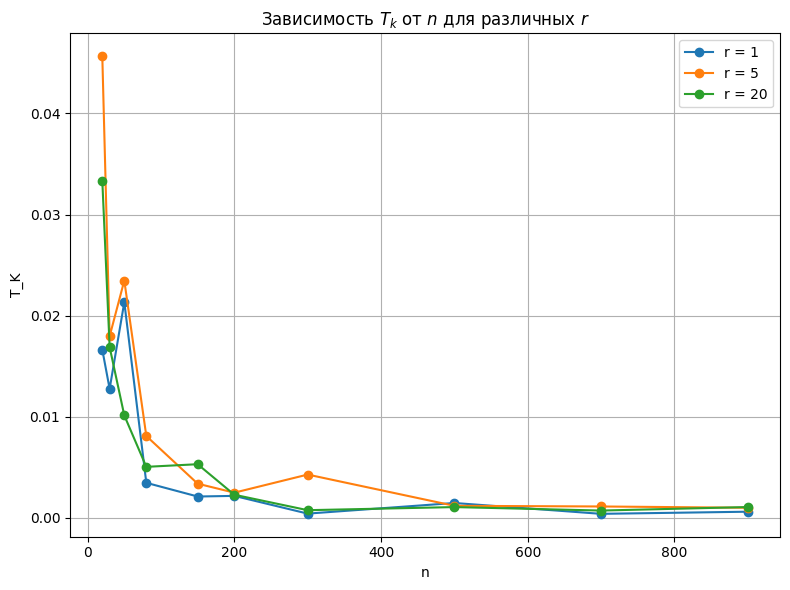

In [46]:
r_list = [1, 5, 20]
n_list = [20, 30, 50, 80, 150, 200, 300, 500, 700, 900]

Ts = {r: [] for r in r_list}


for r in r_list:
    for n in n_list:
        Ts[r].append(compute_T(n, r))


plt.figure(figsize=(8, 6))
for r in r_list:
    plt.plot(n_list, Ts[r], marker='o', label=f'r = {r}')

plt.xlabel('n')
plt.ylabel('T_K')
plt.title(f'Зависимость $T_k$ от $n$ для различных $r$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ***Задача 2: распределение верхних экстремумов для показательной модели (3 балла)***


Целью данной задачи является экспериментальная проверка следующего утверждения. Пусть $(X_1, \dots, X_n)$ -- выборка из экспоненциального распределения $ \operatorname{Exp}(1)$.  Тогда для всех $x \in \mathbb R$ выполнено равенство
$$
	\lim\limits_{n \rightarrow \infty} \mathbb P\left( X_{(n)} - \ln n \leq x \right) = G(x),
$$
где  $X_{(n)}$ -- максимальная порядковая статистика, а $G(x) = e^{-e^{-x}}$ -- функция распределения Гумбеля.
Выполните следующие задания.

### **1.** Зафиксируйте $n$.

In [47]:
n = 100

### **2.** Сгенерируйте $K = n^2$ выборок $(X_1^k, X_2^k, ... , X_n^k)$ объема $n$ из экспоненциального распределения $\operatorname{Exp}(1)$. В каждой из $K$ выборок определить  $X_{(n)}^k$, $1 \le k \le K$.

In [48]:
K = n ** 2
X = np.random.exponential(scale=1.0, size=(K, n))
maxs = X.max(axis=1)

### **3.** Вычислите эмпирическую функцию распределения \begin{equation}
    \hat G_K(x) = \cfrac{1}{K} \sum\limits_{k=1}^{K}\mathbb{1}\left(X_{(n)}^k - \ln n \le x \right), \;\;\; x \ge 0,
\end{equation} где $\mathbb{1}$ -- это индикатор. Постройте графики зависимостей $\hat G_K(x)$ и $G(x) = e^{-e^{-x}}$ от $x$.

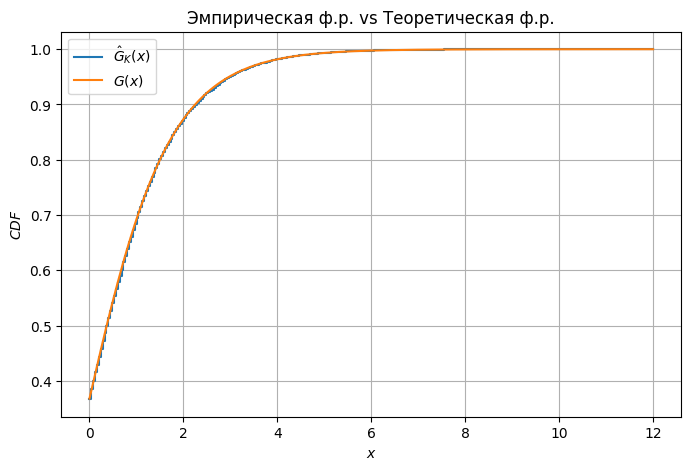

In [49]:
shifted_maxs = maxs - np.log(n)

x_grid = np.linspace(0, 12, 300)

G_k_emp = np.array([np.mean(shifted_maxs <= x) for x in x_grid])
G_x_theo = np.exp(-np.exp(-x_grid))

plt.figure(figsize=(8, 5))
plt.step(x_grid, G_k_emp, where='post', label=r'$\hat G_K(x)$')
plt.plot(x_grid, G_x_theo, label=r'$G(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$CDF$')
plt.title('Эмпирическая ф.р. vs Теоретическая ф.р.')
plt.legend()
plt.grid(True)
plt.show()

 ### **4.** Убедитесь, что $\hat G_K$ близка к $G(x) = e^{-e^{-x}}$. Для этого вычислите \begin{equation}
    T_K = \operatorname{sup}\limits_{x \ge 0} \left| \hat G_K(x) - G(x) \right|.
\end{equation} Обратите внимание, что $\hat G_K$ -- кусочно постоянная функция, а G - монотонная. Поэтому значение статистики $T_K$ можно найти точно.

In [50]:
T_K = np.max(np.abs(G_k_emp - G_x_theo))
print(f"T_K = {T_K:.6f}")

T_K = 0.003616


### **5.** Повторите задания пп. 1, 2 и 4 при различных $n$. Постройте график зависимости $T_K$ от $n$. Необходимо взять не менее $10$ различных значений $n$.

In [51]:
def compute_Tk(n):
    K = n ** 2
    X = np.random.exponential(scale=1.0, size=(K, n))
    maxs = X.max(axis=1)
    shifted_maxs = maxs - np.log(n)

    x_grid = np.linspace(0, 12, 300)
    G_k_emp = np.array([np.mean(shifted_maxs <= x) for x in x_grid])
    G_x_theo = np.exp(-np.exp(-x_grid))

    return np.max(np.abs(G_k_emp - G_x_theo))

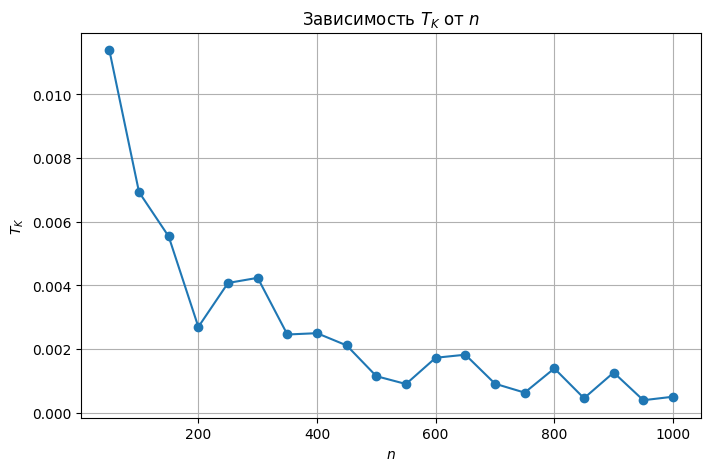

In [52]:
n_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
T_values = []

for n in n_list:
    T_values.append(compute_Tk(n))

plt.figure(figsize=(8, 5))
plt.plot(n_list, T_values, marker='o', linestyle='-')
plt.xlabel(r'$n$')
plt.ylabel(r'$T_K$')
plt.title('Зависимость $T_K$ от $n$')
plt.grid(True)
plt.show()

## ***Задача 3: квадратичные формы гауссовских случайных векторов с идемподентными матрицами (4 балла)***

### **1.** Зафиксируйте $n \in \mathbb{N}$ и натуральное $r$ от $2$ до $(n - 1)$.

In [53]:
n = 100
r = 20

### **2.** Выберите симметричную идемпотентную матрицу $A$ ранга $r$ (то есть симметричную матрицу ранга $r$, удовлетворяющую равенству $A^2 = A$). Матрица не должна быть диагональной. В замечании 2 (см. текст ниже) описан один из способов получения такой матрицы, но Вы можете воспользоваться и другими на Ваше усмотрение.

In [54]:
def get_A(n, r, seed=None):
    if seed is not None:
        np.random.seed(seed)
    Q, _ = np.linalg.qr(np.random.randn(n, r))
    return Q @ Q.T

In [55]:
from numpy.linalg.linalg import eig
from scipy import linalg

A = get_A(n, r)
print(A)

[[ 0.17352275  0.13213949  0.0178345  ... -0.01174627 -0.01465969
  -0.06700201]
 [ 0.13213949  0.36283283 -0.04539686 ... -0.04455008 -0.03441351
  -0.02359885]
 [ 0.0178345  -0.04539686  0.18146386 ...  0.01600307 -0.00220395
  -0.01007832]
 ...
 [-0.01174627 -0.04455008  0.01600307 ...  0.17774738  0.0431209
  -0.04005278]
 [-0.01465969 -0.03441351 -0.00220395 ...  0.0431209   0.20166584
   0.02979568]
 [-0.06700201 -0.02359885 -0.01007832 ... -0.04005278  0.02979568
   0.27500939]]


In [56]:
#Проверьте вашу матрицу - должно быть везде True

print((A@A - A< 1e-14).all())
print(np.linalg.matrix_rank(A) == r)

True
True


### **3.** Сгенерируйте $K = n^2$ случайных векторов $X_1, X_2, ... , X_K \in \mathbb{R}^n$ из нормального распределения $\mathcal{N}(0, I_n)$.

In [57]:
import scipy.stats
K = n**2

X = np.random.randn(K, n)

### **4.** По набору наблюдений $X_1^\top AX_1, ..., X_K^\top AX_K$ постройте гистограмму. На тот же рисунок добавьте график плотности распределения $\chi^2(r)$. Убедитесь, что распределение хи-квадрат хорошо аппроксимирует гистограмму. Как это согласуется с теорией?

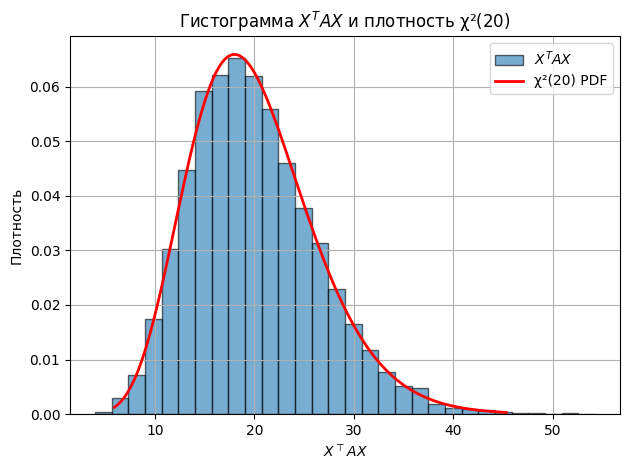

In [58]:
from scipy.stats import chi2

Q_vals = np.einsum('ij,jk,ik->i', X, A, X)

plt.hist(Q_vals, bins=30, density=True, alpha=0.6, edgecolor='black', label='$X^T A X$')

x = np.linspace(chi2.ppf(0.001, r), chi2.ppf(0.999, r), 200)
plt.plot(x, chi2.pdf(x, r), 'r-', lw=2, label=f'χ²({r}) PDF')

plt.xlabel(r'$X^\top A X$')
plt.ylabel('Плотность')
plt.title(f'Гистограмма $X^T A X$ и плотность χ²({r})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Мы получили распределение $\chi^2(r)$, потому что $A$ $-$ это проектор, следовательно, её собственные значения могут быть только нулями или единицами, что означает, что мы имеем $r$ единиц и $n-r$ нулей в собственном разложении $A$, откуда получаем:
$$
X_i^TAX_i = X_i^TU\Lambda U^TX_i = (U^TX_i)^T\Lambda (U^TX_i) = Y_i^T \Lambda Y_i
$$
Векторы $Y_i$ имеют то же распределение, как $X_i$ (это вроде как очевидно), а это означает, что $X_r^TAX_r$ $-$ сумма квадратов $r$ независимых стандартных нормальных случайных величин, а это по определению $\chi^2(r)$.

### **5.** Убедитесь, что эмперическая функция распределения \begin{equation}
    \hat F_K(t) = \cfrac{1}{K}\sum\limits_{k=1}^{K} \mathbb{1}\left( X_k^\top AX_k \le t \right), \;\;\; t \ge 0, \end{equation}
### близка к функции распределения $\chi^2(r)$.
###  Пусть $G_r(t)$ - функция распределения $\chi^2(r)$ (доступна в библиотеке scipy). Постройте графики зависимостей $\hat F_K(t)$ и $G_r(t)$ от $t$.
###  Вычислите \begin{equation} T_K = \operatorname{sup}\limits_{t \ge 0}\left| \hat F_K(t) - G_r(t)\right|. \end{equation} Обратите внимание, что $\hat F_K$ -- кусочно постоянная функция, а $G_r$ - монотонная. Поэтому значение статистики $T_K$ можно найти точно.

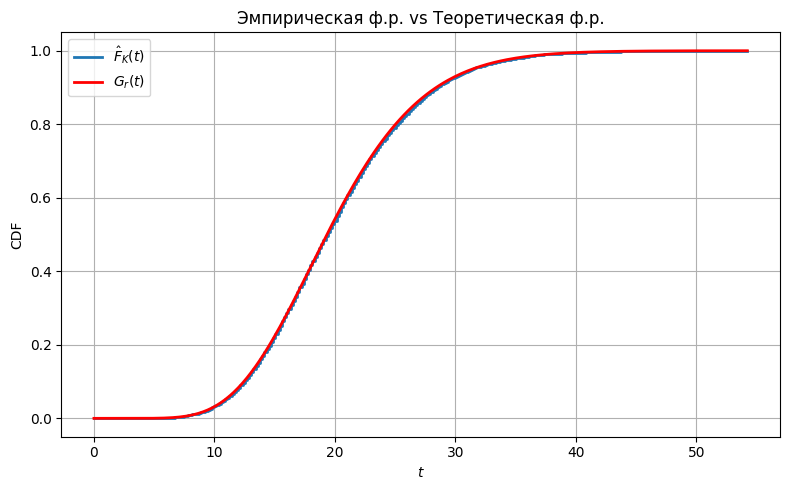

In [59]:
t = np.linspace(0, max(chi2.ppf(0.999, r), Q_vals.max()), 300)

F_emp = np.searchsorted(np.sort(Q_vals), t, side='right') / K

F_theor = chi2.cdf(t, r)

plt.figure(figsize=(8, 5))
plt.step(t, F_emp, where='post', label=r'$\hat F_K(t)$', linewidth=2)
plt.plot(t, F_theor, 'r-', label=fr'$G_{{r}}(t)$', linewidth=2)
plt.xlabel(r'$t$')
plt.ylabel('CDF')
plt.title(rf'Эмпирическая ф.р. vs Теоретическая ф.р.')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
T_K = np.max(np.abs(F_emp - F_theor))
print(f"T_K = {T_K:.6f}")

T_K = 0.006223


### **6.** Повторите задания пп. 1, 2, 3, 5 при различных значениях $r$ и $n$. При каждом $r$ постройте график зависимости $T_K$ от $n$. Убедитесь, что значение $T_K$ стремится к нулю с ростом $n$. Необходимо выбрать не менее трёх различных значений $r$ и не менее $10$ различных значений $n$.

In [61]:
def compute_T_K(Q_vals, r):
    K = len(Q_vals)

    Q_sorted = np.sort(Q_vals)
    t_points = np.concatenate(([0.0], Q_sorted))

    F_emp = np.searchsorted(Q_sorted, t_points, side='right') / K
    F_theor = chi2.cdf(t_points, df=r)

    return np.max(np.abs(F_emp - F_theor))

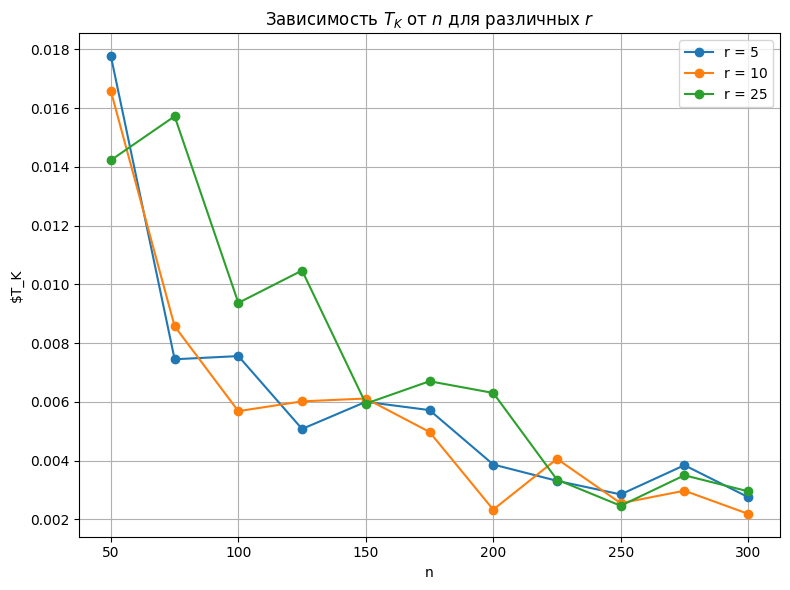

In [62]:
r_list = [5, 10, 25]
n_list = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

results = {r: [] for r in r_list}

for r in r_list:
    for n in n_list:
        K = n**2
        T_vals = []
        seed = 1000 * r + n + 1
        A = get_A(n, r, seed=seed)
        X = np.random.RandomState(seed).randn(K, n)
        Q_vals = np.einsum('ij,jk,ik->i', X, A, X)
        T_vals.append(compute_T_K(Q_vals, r))
        results[r].append(T_vals)

plt.figure(figsize=(8, 6))
for r in r_list:
    plt.plot(n_list, results[r], marker='o', label=f'r = {r}')

plt.xlabel('n')
plt.ylabel(r'$T_K')
plt.title(r'Зависимость $T_K$ от $n$ для различных $r$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### _Замечание 1._

Пусть $\mathfrak{z}_1, \mathfrak{z}_2, ..., \mathfrak{z}_K$ - независимые случайные величины с функцией распределения $F$. Обозначим через $\hat F_K$ эмперическую функцию распределения. Согласно теореме Дворецкого-Кифера-Вольфовитца, выполнено неравенство

$$\mathbb{E}\operatorname{sup}_{x \in \mathbb{R}} \left| \hat F_K - F_K \right| \le \cfrac{1}{\sqrt{K}},$$

то есть имеет место равномерная по $x \in \mathbb{R}$ сходимость эмпирической функции распределения к $F$. В численных экспериментах рекомендуется взять $K = n^2$, чтобы ошибка приближения функции распределения не превышала $1/n$ и не вносила существенного вклада в величину статистики $T_K$.

### _Замечание 2._

Чтобы получить симметричную идемпотентную матрицу $A \in \mathbb{R}^{n \times n}$ ранга $r \in \{ 1, ..., n\}$, проделайте следующие шаги.

- Возьмите невырожденную симметричную матрицу $B \in \mathbb{R}^{n \times n}$.
- Найдите ортонормированные собственные векторы $u_1, ..., u_n$ мтарицы $B$ (соответствующие функции доступны в библиотеках numpy и scipy).
- Из $u_1, ..., u_n$ выберите произвольные $r$ векторов и составьте матрицу $U_r \in \mathbb{R}^{n \times r}$ со столбцами из этих векторов.
- $A = U_rU_r^\top$ - искомая матрица.